In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

df = pd.read_csv('BestTrack_since1994_WP.csv')
csv_time = pd.to_datetime(df['ISO_TIME'].values)

latitude = df['MEAN_LAT'].tolist()
longitude = df['MEAN_LON'].tolist()

temp_0m_yesterday = []
temp_10m_yesterday = []
temp_20m_yesterday = []
temp_30m_yesterday = []
temp_40m_yesterday = []
temp_50m_yesterday = []
temp_60m_yesterday = []
temp_70m_yesterday = []
temp_80m_yesterday = []
temp_90m_yesterday = []
temp_100m_yesterday = []

temp_0m_today = []
temp_10m_today = []
temp_20m_today = []
temp_30m_today = []
temp_40m_today = []
temp_50m_today = []
temp_60m_today = []
temp_70m_today = []
temp_80m_today = []
temp_90m_today = []
temp_100m_today = []

temp_0m_tomorrow = []

def append_nan():
    temp_0m_yesterday.append(np.NaN)
    temp_10m_yesterday.append(np.NaN)
    temp_20m_yesterday.append(np.NaN)
    temp_30m_yesterday.append(np.NaN)
    temp_40m_yesterday.append(np.NaN)
    temp_50m_yesterday.append(np.NaN)
    temp_60m_yesterday.append(np.NaN)
    temp_70m_yesterday.append(np.NaN)
    temp_80m_yesterday.append(np.NaN)
    temp_90m_yesterday.append(np.NaN)
    temp_100m_yesterday.append(np.NaN)

    temp_0m_today.append(np.NaN)
    temp_10m_today.append(np.NaN)
    temp_20m_today.append(np.NaN)
    temp_30m_today.append(np.NaN)
    temp_40m_today.append(np.NaN)
    temp_50m_today.append(np.NaN)
    temp_60m_today.append(np.NaN)
    temp_70m_today.append(np.NaN)
    temp_80m_today.append(np.NaN)
    temp_90m_today.append(np.NaN)
    temp_100m_today.append(np.NaN)

    temp_0m_tomorrow.append(np.NaN)

def process_nc_file(file_path, season, number, idx_start):
    dataset = xr.open_dataset(file_path)
    data = dataset['water_temp']
    nc_time = pd.to_datetime(dataset['time'].values)

    num = (df['SEASON'] == season) & (df['NUMBER'] == number)
    indices = np.where(num)[0]
    
    for i in indices:
        time_idx = np.where(nc_time == csv_time[idx_start])
        if time_idx[0].size == 0:
            append_nan()
        else:
            target_time = nc_time[time_idx]
            target_before_24h = target_time - pd.Timedelta(hours=24)
            target_after_24h = target_time + pd.Timedelta(hours=24)

            formatted_dates_before = pd.DatetimeIndex(target_before_24h.strftime('%Y-%m-%d %H:%M:%S'))
            formatted_dates_after = pd.DatetimeIndex(target_after_24h.strftime('%Y-%m-%d %H:%M:%S'))

            time_idx_before = np.where(nc_time == formatted_dates_before[0])
            time_idx_after = np.where(nc_time == formatted_dates_after[0])

            if time_idx_before[0].size == 0 or time_idx_after[0].size == 0:
                append_nan()
            else:
                temp_0m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=0).values)
                temp_10m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=5).values)
                temp_20m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=8).values)
                temp_30m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=10).values)
                temp_40m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=12).values)
                temp_50m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=14).values)
                temp_60m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=15).values)
                temp_70m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=16).values)
                temp_80m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=17).values)
                temp_90m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=18).values)
                temp_100m_yesterday.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                      .isel(time=time_idx_before[0], depth=19).values)
        
                temp_0m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=0).values)
                temp_10m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=5).values)
                temp_20m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=8).values)
                temp_30m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=10).values)
                temp_40m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=12).values)
                temp_50m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=14).values)
                temp_60m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=15).values)
                temp_70m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=16).values)
                temp_80m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=17).values)
                temp_90m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=18).values)
                temp_100m_today.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                  .isel(time=time_idx[0], depth=19).values)

                temp_0m_tomorrow.extend(data.sel(lat=latitude[idx_start], lon=longitude[idx_start], method='nearest')
                                     .isel(time=time_idx_after[0], depth=0).values)
        idx_start += 1
    
    return idx_start

def replace_nan_with_previous_depth():

    for i in range(len(temp_10m_today)):
        if np.isnan(temp_10m_today[i]):
            if not np.isnan(temp_0m_today[i]):
                temp_10m_today[i] = temp_0m_today[i]
        if np.isnan(temp_20m_today[i]):
            if not np.isnan(temp_10m_today[i]):
                temp_20m_today[i] = temp_10m_today[i]
        if np.isnan(temp_30m_today[i]):
            if not np.isnan(temp_20m_today[i]):
                temp_30m_today[i] = temp_20m_today[i]
        if np.isnan(temp_40m_today[i]):
            if not np.isnan(temp_30m_today[i]):
                temp_40m_today[i] = temp_30m_today[i]
        if np.isnan(temp_50m_today[i]):
            if not np.isnan(temp_40m_today[i]):
                temp_50m_today[i] = temp_40m_today[i]
        if np.isnan(temp_60m_today[i]):
            if not np.isnan(temp_50m_today[i]):
                temp_60m_today[i] = temp_50m_today[i]
        if np.isnan(temp_70m_today[i]):
            if not np.isnan(temp_60m_today[i]):
                temp_70m_today[i] = temp_60m_today[i]
        if np.isnan(temp_80m_today[i]):
            if not np.isnan(temp_70m_today[i]):
                temp_80m_today[i] = temp_70m_today[i]
        if np.isnan(temp_90m_today[i]):
            if not np.isnan(temp_80m_today[i]):
                temp_90m_today[i] = temp_80m_today[i]
        if np.isnan(temp_100m_today[i]):
            if not np.isnan(temp_90m_today[i]):
                temp_100m_today[i] = temp_90m_today[i]

    for i in range(len(temp_10m_yesterday)):
        if np.isnan(temp_10m_yesterday[i]):
            if not np.isnan(temp_0m_yesterday[i]):
                temp_10m_yesterday[i] = temp_0m_yesterday[i]
        if np.isnan(temp_20m_yesterday[i]):
            if not np.isnan(temp_10m_yesterday[i]):
                temp_20m_yesterday[i] = temp_10m_yesterday[i]
        if np.isnan(temp_30m_yesterday[i]):
            if not np.isnan(temp_20m_yesterday[i]):
                temp_30m_yesterday[i] = temp_20m_yesterday[i]
        if np.isnan(temp_40m_yesterday[i]):
            if not np.isnan(temp_30m_yesterday[i]):
                temp_40m_yesterday[i] = temp_30m_yesterday[i]
        if np.isnan(temp_50m_yesterday[i]):
            if not np.isnan(temp_40m_yesterday[i]):
                temp_50m_yesterday[i] = temp_40m_yesterday[i]
        if np.isnan(temp_60m_yesterday[i]):
            if not np.isnan(temp_50m_yesterday[i]):
                temp_60m_yesterday[i] = temp_50m_yesterday[i]
        if np.isnan(temp_70m_yesterday[i]):
            if not np.isnan(temp_60m_yesterday[i]):
                temp_70m_yesterday[i] = temp_60m_yesterday[i]
        if np.isnan(temp_80m_yesterday[i]):
            if not np.isnan(temp_70m_yesterday[i]):
                temp_80m_yesterday[i] = temp_70m_yesterday[i]
        if np.isnan(temp_90m_yesterday[i]):
            if not np.isnan(temp_80m_yesterday[i]):
                temp_90m_yesterday[i] = temp_80m_yesterday[i]
        if np.isnan(temp_100m_yesterday[i]):
            if not np.isnan(temp_90m_yesterday[i]):
                temp_100m_yesterday[i] = temp_90m_yesterday[i]

idx = 0
file_list = [
    ## Total 108 Typhoons, 6296 Data

    ## 1994 (37 typhoons, 2392 data)
    ('data_1994_25.nc4', 1994, 25),
    ('data_1994_30.nc4', 1994, 30),
    ('data_1994_32.nc4', 1994, 32),
    ('data_1994_34.nc4', 1994, 34),
    ('data_1994_40.nc4', 1994, 40),
    ('data_1994_41.nc4', 1994, 41),
    ('data_1994_43.nc4', 1994, 43),
    ('data_1994_44.nc4', 1994, 44),
    ('data_1994_46.nc4', 1994, 46),
    ('data_1994_52.nc4', 1994, 52),
    ('data_1994_53.nc4', 1994, 53),
    ('data_1994_54.nc4', 1994, 54),
    ('data_1994_55.nc4', 1994, 55),
    ('data_1994_56.nc4', 1994, 56),
    ('data_1994_57.nc4', 1994, 57),
    ('data_1994_60.nc4', 1994, 60),
    ('data_1994_63.nc4', 1994, 63),
    ('data_1994_66.nc4', 1994, 66),
    ('data_1994_67.nc4', 1994, 67),
    ('data_1994_68.nc4', 1994, 68),
    ('data_1994_70.nc4', 1994, 70),
    ('data_1994_72.nc4', 1994, 72),
    ('data_1994_77.nc4', 1994, 77),
    ('data_1994_78.nc4', 1994, 78),
    ('data_1994_80.nc4', 1994, 80),
    ('data_1994_81.nc4', 1994, 81),
    ('data_1994_84.nc4', 1994, 84),
    ('data_1994_87.nc4', 1994, 87),
    ('data_1994_93.nc4', 1994, 93),
    ('data_1994_94.nc4', 1994, 94),
    ('data_1994_97.nc4', 1994, 97),
    ('data_1994_98.nc4', 1994, 98),
    ('data_1994_99.nc4', 1994, 99),
    ('data_1994_101.nc4', 1994, 101),
    ('data_1994_102.nc4', 1994, 102),
    ('data_1994_110.nc4', 1994, 110),
    ('data_1994_112.nc4', 1994, 112),

    ## 1995 (25 typhoons, 1226 data)
    ('data_1995_18.nc4', 1995, 18),
    ('data_1995_23.nc4', 1995, 23),
    ('data_1995_24.nc4', 1995, 24),
    ('data_1995_29.nc4', 1995, 29),
    ('data_1995_33.nc4', 1995, 33),
    ('data_1995_38.nc4', 1995, 38),
    ('data_1995_43.nc4', 1995, 43),
    ('data_1995_44.nc4', 1995, 44),
    ('data_1995_46.nc4', 1995, 46),
    ('data_1995_51.nc4', 1995, 51),
    ('data_1995_53.nc4', 1995, 53),
    ('data_1995_55.nc4', 1995, 55),
    ('data_1995_58.nc4', 1995, 58),
    ('data_1995_59.nc4', 1995, 59),
    ('data_1995_64.nc4', 1995, 64),
    ('data_1995_67.nc4', 1995, 67),
    ('data_1995_73.nc4', 1995, 73),
    ('data_1995_75.nc4', 1995, 75),
    ('data_1995_78.nc4', 1995, 78),
    ('data_1995_79.nc4', 1995, 79),
    ('data_1995_80.nc4', 1995, 80),
    ('data_1995_81.nc4', 1995, 81), 
    ('data_1995_84.nc4', 1995, 84), 
    ('data_1995_86.nc4', 1995, 86),
    ('data_1995_94.nc4', 1995, 94),

    # 1996 (32 typhoons, 1827 data)
    ('data_1996_25.nc4', 1996, 25), 
    ('data_1996_33.nc4', 1996, 33), 
    ('data_1996_35.nc4', 1996, 35), 
    ('data_1996_44.nc4', 1996, 44), 
    ('data_1996_48.nc4', 1996, 48), 
    ('data_1996_49.nc4', 1996, 49), 
    ('data_1996_50.nc4', 1996, 50), 
    ('data_1996_51.nc4', 1996, 51), 
    ('data_1996_53.nc4', 1996, 53), 
    ('data_1996_55.nc4', 1996, 55), 
    ('data_1996_56.nc4', 1996, 56), 
    ('data_1996_58.nc4', 1996, 58), 
    ('data_1996_60.nc4', 1996, 60), 
    ('data_1996_61.nc4', 1996, 61),
    ('data_1996_62.nc4', 1996, 62),
    ('data_1996_66.nc4', 1996, 66),
    ('data_1996_71.nc4', 1996, 71),
    ('data_1996_73.nc4', 1996, 73),
    ('data_1996_77.nc4', 1996, 77),
    ('data_1996_78.nc4', 1996, 78),
    ('data_1996_81.nc4', 1996, 81),
    ('data_1996_82.nc4', 1996, 82),
    ('data_1996_84.nc4', 1996, 84),
    ('data_1996_90.nc4', 1996, 90),
    ('data_1996_91.nc4', 1996, 91),
    ('data_1996_97.nc4', 1996, 97),
    ('data_1996_101.nc4', 1996, 101),
    ('data_1996_104.nc4', 1996, 104),
    ('data_1996_107.nc4', 1996, 107),
    ('data_1996_108.nc4', 1996, 108),
    ('data_1996_118.nc4', 1996, 118),
    ('data_1996_120.nc4', 1996, 120),

    # 1997 (14 typhoons, 851 data)
    ('data_1997_4.nc4', 1997, 4),
    ('data_1997_21.nc4', 1997, 21),
    ('data_1997_23.nc4', 1997, 23),
    ('data_1997_25.nc4', 1997, 25),
    ('data_1997_28.nc4', 1997, 28), 
    ('data_1997_29.nc4', 1997, 29),
    ('data_1997_31.nc4', 1997, 31),
    ('data_1997_36.nc4', 1997, 36),
    ('data_1997_37.nc4', 1997, 37),
    ('data_1997_47.nc4', 1997, 47), 
    ('data_1997_52.nc4', 1997, 52),
    ('data_1997_53.nc4', 1997, 53), 
    ('data_1997_55.nc4', 1997, 55),

]

for file_path, season, number in file_list:
    idx = process_nc_file(file_path, season, number, idx)

replace_nan_with_previous_depth()


In [3]:
print(temp_0m_today)
print(len(temp_0m_today))

[27.888, 27.98, 27.970001, 27.858, 27.831001, 27.82, 28.061, 27.911, 27.854, 27.762001, 27.743, 27.77, 27.825, 28.004002, 27.969, 27.882, 27.843, 27.834, 27.787, 27.837, 27.907001, 28.171001, 28.217, 27.905, 27.863, 27.648, 27.487, 27.502, 27.398, nan, 27.55, nan, 27.679, 28.006, 28.152, 28.258, 28.312, 28.112, 28.337002, 28.307, 28.252, 28.247002, 28.431, 28.315, 27.741001, 27.602001, 27.67, 27.424, 27.2, 27.129, 27.55, 28.237999, 28.54, 27.83, 27.272, 27.152, 27.143, 27.027, 27.439, 28.005001, 27.591, 27.508, 27.408, 26.757, 26.277, 26.101, 26.09, 26.241001, 28.669, 28.702, 28.851002, 28.876, 28.727001, 28.422, 28.284, 28.305, 28.396, 28.508, 28.496, 28.372002, 28.613, 28.655, 28.566, 28.556, 28.447, 28.471, 28.514, 28.681, 28.769001, 28.76, 28.432, 27.844, 27.685001, 27.939001, 27.802, 27.889, 28.345001, 27.893002, nan, 26.805, 27.012001, 26.566, 26.721, 27.515, 26.113, 24.9, nan, 23.545, 23.308, 22.685, 22.008, 21.833, 21.316, 21.504, nan, 19.86, 19.372, 18.961, 16.879, 17.609, 13.

In [26]:
import numpy as np
import pandas as pd

df = pd.read_csv('BestTrack_since1994_WP.csv')

latitude = df['MEAN_LAT'].tolist()
longitude = df['MEAN_LON'].tolist()
pressure = df['MEAN_PRES'].tolist()
wind = df['MEAN_WIND'].tolist()
storm_speed = df['STORM_SPEED'].tolist()

today_0m_arr = np.array(temp_0m_today)

def get_non_nan_idx(arr):
    return np.where(~np.isnan(arr))[0]

non_nan_idx = get_non_nan_idx(today_0m_arr)

def filter_data(data_list, non_nan_idx):
    return [np.array(data)[list(non_nan_idx)] for data in data_list]

temp_yesterday = [temp_0m_yesterday, temp_10m_yesterday, temp_20m_yesterday, temp_30m_yesterday,
                  temp_40m_yesterday, temp_50m_yesterday, temp_60m_yesterday, temp_70m_yesterday,
                  temp_80m_yesterday, temp_90m_yesterday, temp_100m_yesterday]

temp_today = [temp_0m_today, temp_10m_today, temp_20m_today, temp_30m_today, temp_40m_today,
              temp_50m_today, temp_60m_today, temp_70m_today, temp_80m_today, temp_90m_today,
              temp_100m_today]

latitude_arr, longitude_arr, pressure_arr, wind_arr, storm_speed_arr = filter_data(
    [latitude, longitude, pressure, wind, storm_speed], non_nan_idx)

temp_yesterday_filtered = filter_data(temp_yesterday, non_nan_idx)
temp_today_filtered = filter_data(temp_today, non_nan_idx)

temp_0m_tomorrow_filtered = np.array(temp_0m_tomorrow)[list(non_nan_idx)]

all_input = [
    [lat, lon, pres, wind, spd, *yes, *tod]
    for lat, lon, pres, wind, spd, yes, tod
    in zip(latitude_arr, longitude_arr, pressure_arr, wind_arr, storm_speed_arr,
           zip(*temp_yesterday_filtered), zip(*temp_today_filtered))
]

all_target = temp_0m_tomorrow_filtered


print(len(all_target))          # except NaN, 5779 data


5779


In [27]:
import csv

header = ['latitude', 'longitude', 'pressure', 'wind_speed', 'strom_speed',
          'temp_0m_yes', 'temp_10m_yes', 'temp_20m_yes', 'temp_30m_yes', 'temp_40m_yes', 'temp_50m_yes',
          'temp_60m_yes', 'temp_70m_yes', 'temp_80m_yes', 'temp_90m_yes', 'temp_100m_yes',
          'temp_0m_tod', 'temp_10m_tod', 'temp_20m_tod', 'temp_30m_tod', 'temp_40m_tod', 'temp_50m_tod',
          'temp_60m_tod', 'temp_70m_tod', 'temp_80m_tod', 'temp_90m_tod', 'temp_100m_tod',
          'temp_0m_tom'
           ]

for i in range(len(all_input)):
    all_input[i].append(all_target[i])  

with open('MachineLearningData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(all_input)

print("complete to save csv file")

CSV 파일로 저장되었습니다.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

train_input, val_input, train_target, val_target = train_test_split(all_input, all_target, test_size=0.2 ,random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
val_scaled = ss.transform(val_input)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# LSTM model
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, recurrent_dropout=0.2, input_shape=(27, 1), name='lstm_layer_1'))
model.add(LSTM(32, activation='tanh', name='lstm_layer_2'))    
model.add(Dense(1, activation='linear', name='output'))  

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# 모델 학습
history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[early_stopping])


Epoch 1/50
145/145 [==============================] - 6s 24ms/step - loss: 404.4437 - mae: 19.6226 - val_loss: 266.8541 - val_mae: 16.0085
Epoch 2/50
145/145 [==============================] - 3s 21ms/step - loss: 210.2642 - mae: 14.1822 - val_loss: 156.8647 - val_mae: 12.2081
Epoch 3/50
145/145 [==============================] - 3s 21ms/step - loss: 122.0678 - mae: 10.7544 - val_loss: 89.2584 - val_mae: 9.1571
Epoch 4/50
145/145 [==============================] - 3s 21ms/step - loss: 68.7900 - mae: 7.9962 - val_loss: 49.8597 - val_mae: 6.7881
Epoch 5/50
145/145 [==============================] - 3s 20ms/step - loss: 38.5958 - mae: 5.8901 - val_loss: 28.5912 - val_mae: 5.0212
Epoch 6/50
145/145 [==============================] - 3s 21ms/step - loss: 22.8431 - mae: 4.3564 - val_loss: 18.2050 - val_mae: 3.7881
Epoch 7/50
145/145 [==============================] - 3s 20ms/step - loss: 15.4186 - mae: 3.3212 - val_loss: 13.6771 - val_mae: 3.0112
Epoch 8/50
145/145 [=========================

In [13]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(4623, 27) (4623,)
(1156, 27) (1156,)


In [14]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer_1 (LSTM)         (None, 27, 64)            16896     
                                                                 
 lstm_layer_2 (LSTM)         (None, 32)                12416     
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


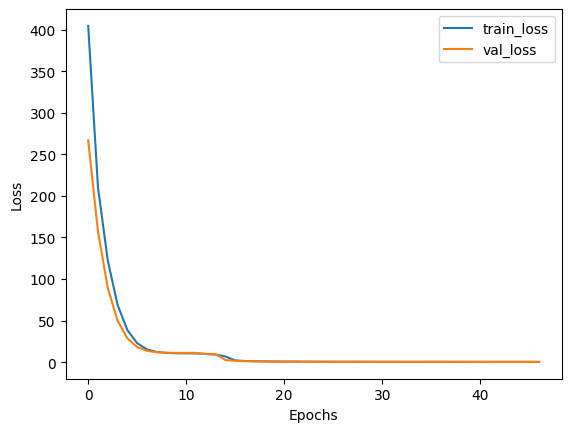

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


37/37 [==============================] - 1s 6ms/step


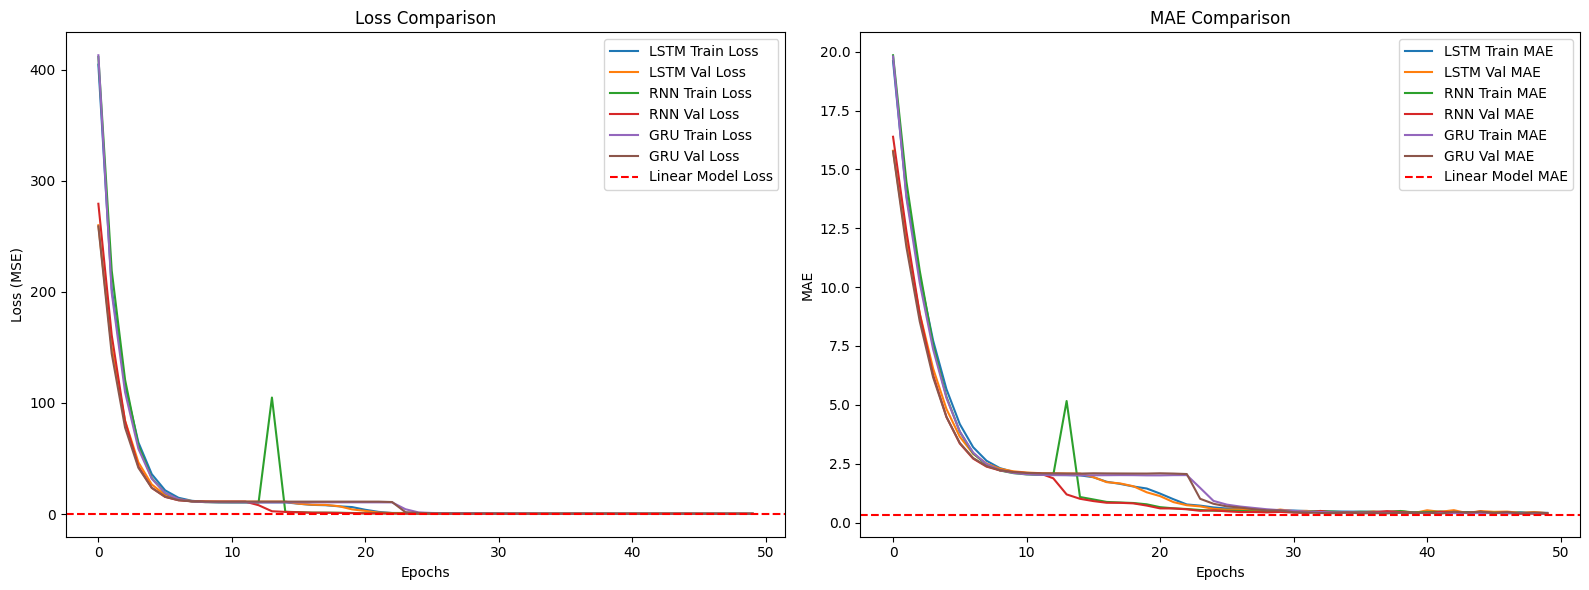

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

train_input, val_input, train_target, val_target = train_test_split(all_input, all_target, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
val_scaled = ss.transform(val_input)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(27, 1), name='lstm_layer_1'))
lstm_model.add(LSTM(32, activation='tanh', name='lstm_layer_2'))
lstm_model.add(Dense(1, activation='linear', name='output'))

lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(27, 1), name='rnn_layer_1'))
rnn_model.add(SimpleRNN(32, activation='tanh', name='rnn_layer_2'))
rnn_model.add(Dense(1, activation='linear', name='output'))

rnn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# GRU model
gru_model = Sequential()
gru_model.add(GRU(64, activation='tanh', return_sequences=True, input_shape=(27, 1), name='gru_layer_1'))
gru_model.add(GRU(32, activation='tanh', name='GRU_layer_2'))
gru_model.add(Dense(1, activation='linear', name='output'))

gru_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# LinearRegression model
linear_model = LinearRegression()

# Model training
lstm_history = lstm_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
rnn_history = rnn_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
gru_history = gru_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
linear_model.fit(train_scaled.reshape(train_scaled.shape[0], -1), train_target)

# Validation predict
lstm_val_predictions = lstm_model.predict(val_scaled)
rnn_val_predictions = rnn_model.predict(val_scaled)
gru_val_predictions = gru_model.predict(val_scaled)
linear_val_predictions = linear_model.predict(val_scaled.reshape(val_scaled.shape[0], -1))

# evaluation
lstm_val_loss = lstm_history.history['val_loss']
rnn_val_loss = rnn_history.history['val_loss']
gru_val_loss = gru_history.history['val_loss']
linear_val_loss = mean_squared_error(val_target, linear_val_predictions)

lstm_val_mae = lstm_history.history['val_mae']
rnn_val_mae = rnn_history.history['val_mae']
gru_val_mae = gru_history.history['val_mae']
linear_val_mae = mean_absolute_error(val_target, linear_val_predictions)

# plotting
plt.figure(figsize=(16, 6))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.axhline(y=linear_val_loss, color='r', linestyle='--', label='Linear Model Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE graph
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['mae'], label='LSTM Train MAE')
plt.plot(lstm_history.history['val_mae'], label='LSTM Val MAE')
plt.plot(rnn_history.history['mae'], label='RNN Train MAE')
plt.plot(rnn_history.history['val_mae'], label='RNN Val MAE')
plt.plot(gru_history.history['mae'], label='GRU Train MAE')
plt.plot(gru_history.history['val_mae'], label='GRU Val MAE')
plt.axhline(y=linear_val_mae, color='r', linestyle='--', label='Linear Model MAE')
plt.title('MAE Comparison')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
